In [1]:
from main import parse_embeddings_and_type, plot_umap_structural

/home/ms3955/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


type
Nucleus                  5315
Cytoplasm                4385
Extracellular            2811
Mitochondrion            1288
Plastid                   645
Endoplasmic reticulum     282
Lysosome/Vacuole          227
Peroxisome                159
Golgi apparatus           126
Cell membrane              23
Name: count, dtype: int64


/tmp/tmp.FjHUGXrP52/ipykernel_1491971/1374779350.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))


           0         1
0  20.900354  5.152050
1  21.343393  5.455780
2  22.993109  3.383916
3  20.280020  9.451528
4  21.543276  9.711114


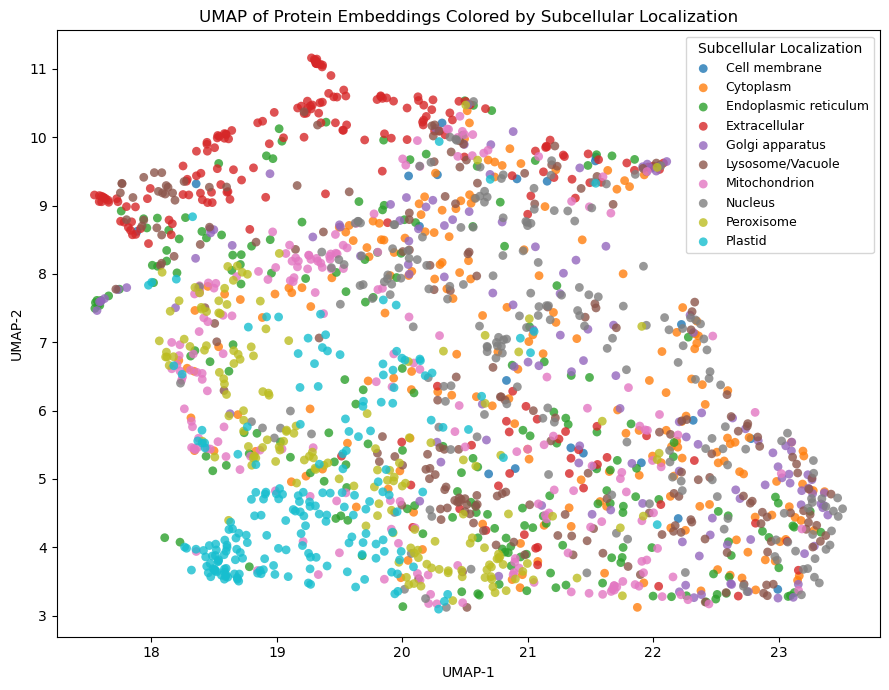

In [9]:
model_name = (
    #'esm2_t6_8M_UR50D'
    #'esm2_t12_35M_UR50D'
    #'esm2_t30_150M_UR50D'
    'prot_bert'
)
#plot_umap_structural(parse_embeddings_and_type(f'{model_name}_embeddings.csv'))

df = parse_embeddings_and_type(f"{model_name}_functional.parquet")
print(df['type'].value_counts())

N_PER_CLASS = 200 
sampled_df = (
    df.groupby("type", group_keys=False)
    .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))
    .reset_index(drop=True)
)

plot_umap_structural(sampled_df)